<a href="https://colab.research.google.com/github/PaulToronto/DataCamp---Finance-Fundamentals-in-Python/blob/main/1_5_S%26P_100_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.5 - S&P 100 Case Study

- **S&P 100 Companies**: Standard and Poor's 100
    - made up of majoor companies that span multiple industry groups
    - used to measure stock performance of large companies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

## The Data

In [2]:
url = 'https://raw.githubusercontent.com/PaulToronto/'
url += 'DataCamp---Finance-Fundamentals-in-Python/refs/heads/main/data/sector.txt'

sp = pd.read_csv(url)
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    102 non-null    object 
 1   Sector  102 non-null    object 
 2   Price   102 non-null    float64
 3   EPS     102 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.3+ KB


In [3]:
sp

,Name,Sector,Price,EPS
0,Apple Inc,Information Technology,170.12,9.20
1,Abbvie Inc,Health Care,93.29,5.31
2,Abbott Laboratories,Health Care,55.28,2.41
3,Accenture Plc,Information Technology,145.30,5.91
4,Allergan Plc,Health Care,171.81,15.42
...,...,...,...,...
97,Verizon Communications Inc,Telecommunications,45.85,3.75
98,Walgreens Boots Alliance,Consumer Staples,70.25,5.10
99,Wells Fargo & Company,Financials,54.02,4.14
100,Wal-Mart Stores,Consumer Staples,96.08,4.36


## Price to Earnings Ratio

- **EPS**: Earnings Per Share is the profit for each share of stock
    - No time span is given, but typically, EPS is the actual earnings over the previous 12 months
    - I'll assume market price is the current market price

$$
\text{Price to earnings ratio} = \frac{\text{Market price}}{\text{Earings per share}}
$$

- This is the ratio for valuing a company that measures its current share price relative to its per-share earnings
- In general, higher P/E ratio indicates higher growth expecatations
    - If EPS (denominator) is low now, but the share price (numerator) is high, that means investors are **optimistic** (they are betting that earings will rise significantly later, even though they are currently modest
    - So a low EPS can lead to a high P/E if growth is expected, but not if the price stays high because of those expectations.
    - A high P/E does not mean that low EPS = growth, it means investors **believe** that future EPS will rise and are therefore willing to pay premium today

In [4]:
sp['PE'] = sp['Price'] / sp['EPS']
sp

,Name,Sector,Price,EPS,PE
0,Apple Inc,Information Technology,170.12,9.20,18.491304
1,Abbvie Inc,Health Care,93.29,5.31,17.568738
2,Abbott Laboratories,Health Care,55.28,2.41,22.937759
3,Accenture Plc,Information Technology,145.30,5.91,24.585448
4,Allergan Plc,Health Care,171.81,15.42,11.142023
...,...,...,...,...,...
97,Verizon Communications Inc,Telecommunications,45.85,3.75,12.226667
98,Walgreens Boots Alliance,Consumer Staples,70.25,5.10,13.774510
99,Wells Fargo & Company,Financials,54.02,4.14,13.048309
100,Wal-Mart Stores,Consumer Staples,96.08,4.36,22.036697


## A closer look at sectors

In [5]:
sectors_normed = sp['Sector'].value_counts(normalize=True).mul(100).round()
sectors_normed

,proportion
Sector,
Consumer Discretionary,16.0
Health Care,15.0
Information Technology,15.0
Financials,15.0
Industrials,13.0
Consumer Staples,12.0
Energy,7.0
Utilities,4.0
Materials,2.0


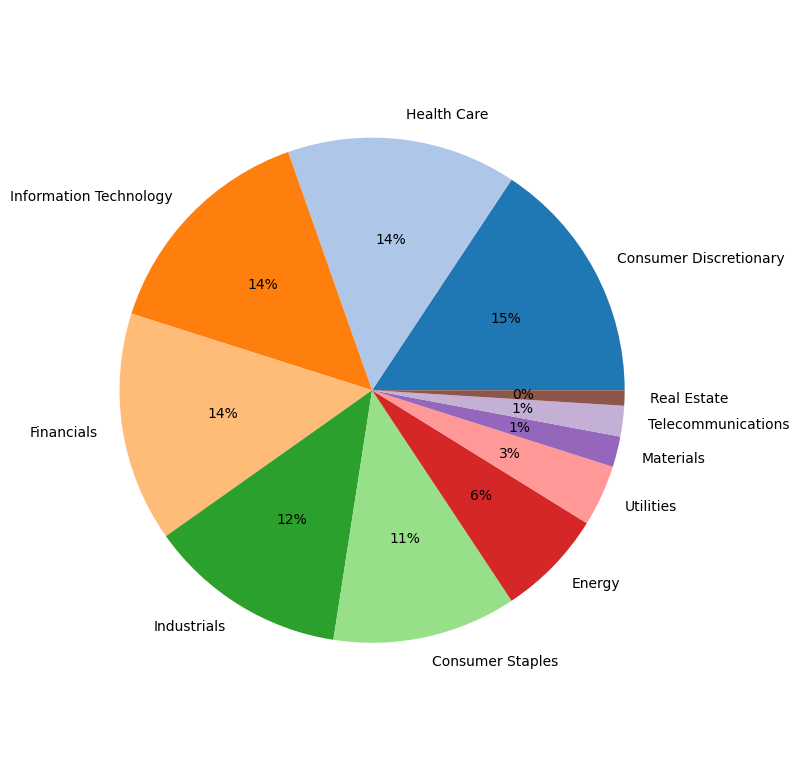

In [6]:
colors = plt.get_cmap('tab20').colors

sectors_normed.plot(kind='pie',
                    colors=colors,
                    figsize=(8, 8),
                    autopct='%d%%',
                    ylabel='')

plt.axis('equal')
plt.tight_layout()
plt.show()

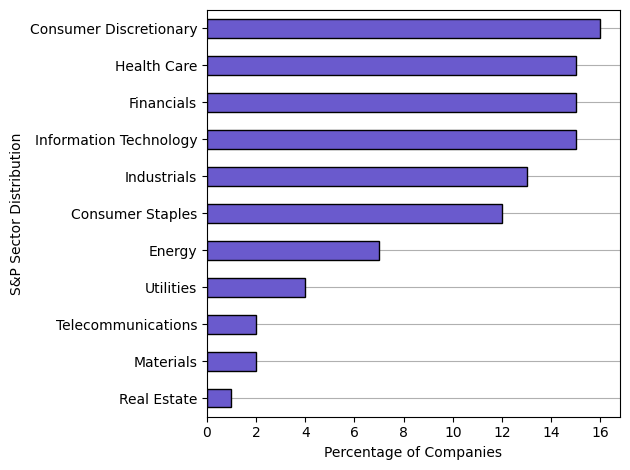

In [7]:
ax = sectors_normed.sort_values().plot(
    kind='barh',
    color='slateblue',
    edgecolor='black'
)

plt.xlabel('Percentage of Companies')
plt.ylabel('S&P Sector Distribution')
plt.grid(axis='y')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

In [8]:
df = sectors_normed.reset_index()
df.columns = ['Sector', 'Percentage']
df

,Sector,Percentage
0,Consumer Discretionary,16.0
1,Health Care,15.0
2,Information Technology,15.0
3,Financials,15.0
4,Industrials,13.0
5,Consumer Staples,12.0
6,Energy,7.0
7,Utilities,4.0
8,Materials,2.0
9,Telecommunications,2.0


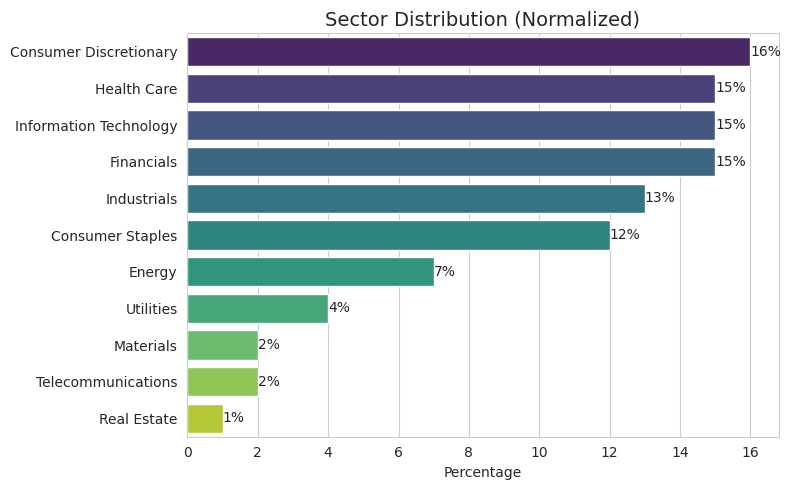

In [9]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df,
    x='Percentage',
    y='Sector',
    palette='viridis',
    hue='Sector'
)

# annotate bars with values
for i in ax.containers:
    ax.bar_label(i, fmt='%d%%')

# Custom labels
ax.set_title("Sector Distribution (Normalized)", fontsize=14)
ax.set_xlabel("Percentage")
ax.set_ylabel("")

plt.tight_layout()

plt.show()

sns.reset_defaults()

In [10]:
df

,Sector,Percentage
0,Consumer Discretionary,16.0
1,Health Care,15.0
2,Information Technology,15.0
3,Financials,15.0
4,Industrials,13.0
5,Consumer Staples,12.0
6,Energy,7.0
7,Utilities,4.0
8,Materials,2.0
9,Telecommunications,2.0


In [11]:
def reorder_categorical_by_value(df, cat_col, val_col, ascending=False):
    """
    Reorder a categorical column based on the values in another column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame
    - cat_col (str): The name of the column to reorder (categorical)
    - val_col (str): The name of the column to order by (numeric)
    - ascending (bool): Whether to sort ascending. Default is descending (largest first)

    Returns:
    - df (pd.DataFrame): A copy of the DataFrame with an ordered categorical column
    """
    df = df.copy()
    ordered_categories = df.sort_values(val_col, ascending=ascending)[cat_col].unique()
    df[cat_col] = pd.Categorical(df[cat_col], categories=ordered_categories, ordered=True)
    return df

In [12]:
df = reorder_categorical_by_value(df, 'Sector', 'Percentage')

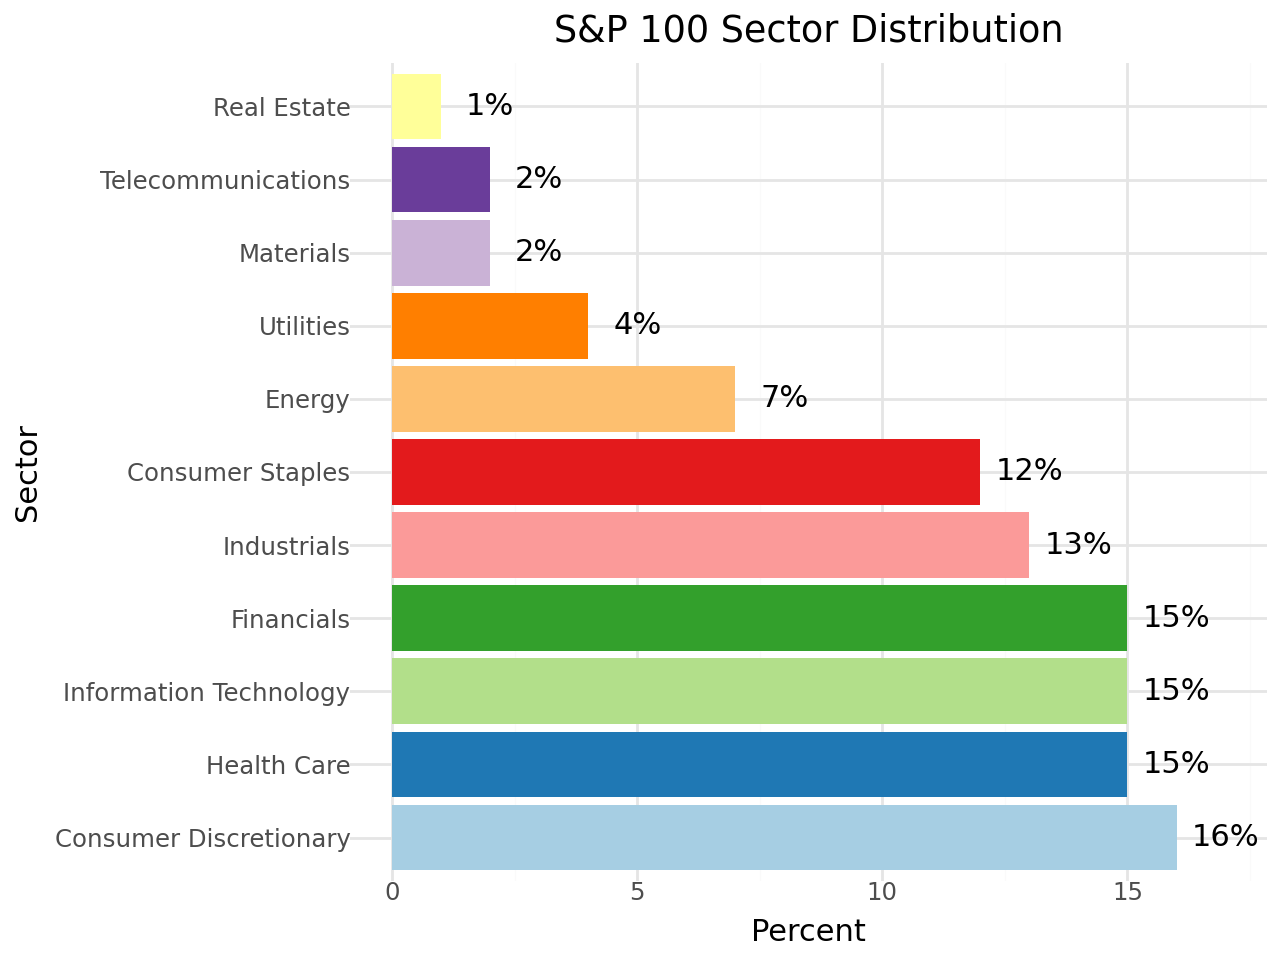

In [13]:
from plotnine import ggplot, aes, geom_col, coord_flip
from plotnine import labs, theme_minimal, geom_text, scale_fill_brewer

df['Label'] = df['Percentage'].astype(int).astype(str) + '%'

(
    ggplot(df, aes(x='Sector', y='Percentage', fill='Sector')) +
    geom_col(show_legend=False) +
    geom_text(aes(label='Label'), nudge_y=1) +
    coord_flip() +
    labs(
        title='S&P 100 Sector Distribution',
        x='Sector',
        y='Percent'
    ) +
    scale_fill_brewer(type='qual', palette='Paired') +
    theme_minimal()
)

## Filter by Sector

In [14]:
information_technology = sp[sp['Sector'] == 'Information Technology']
consumer_staples = sp[sp['Sector'] == 'Consumer Staples']

In [15]:
information_technology.shape, consumer_staples.shape

((15, 5), (12, 5))

In [16]:
it_pe_mean = information_technology['PE'].mean()
it_pe_std = information_technology['PE'].std(ddof=0) # population std

print(it_pe_mean, it_pe_std)

26.333055420408595 10.8661467926753


In [17]:
cs_pe_mean = consumer_staples['PE'].mean()
cs_pe_std = consumer_staples['PE'].std(ddof=0)

print(cs_pe_mean, cs_pe_std)

21.581068906419564 4.412021654267338


In [18]:
it_and_cs = sp[sp['Sector'].isin(['Information Technology', 'Consumer Staples'])]
it_and_cs

,Name,Sector,Price,EPS,PE
0,Apple Inc,Information Technology,170.12,9.20,18.491304
3,Accenture Plc,Information Technology,145.30,5.91,24.585448
21,Colgate-Palmolive Company,Consumer Staples,72.16,2.87,25.142857
25,Costco Wholesale,Consumer Staples,171.22,5.82,29.419244
26,Cisco Systems Inc,Information Technology,36.38,2.17,16.764977
27,CVS Corp,Consumer Staples,70.18,5.71,12.290718
36,Facebook Inc,Information Technology,179.14,5.19,34.516378
44,Alphabet Class C,Information Technology,1018.48,29.87,34.097087
45,Alphabet Class A,Information Technology,1034.09,29.87,34.619685
50,International Business Machines,Information Technology,151.40,13.66,11.083455


In [19]:
it_and_cs.groupby('Sector')['PE'].agg(
    mean='mean',
    std=lambda x: x.std(ddof=0)
)

,mean,std
Sector,,
Consumer Staples,21.581069,4.412022
Information Technology,26.333055,10.866147


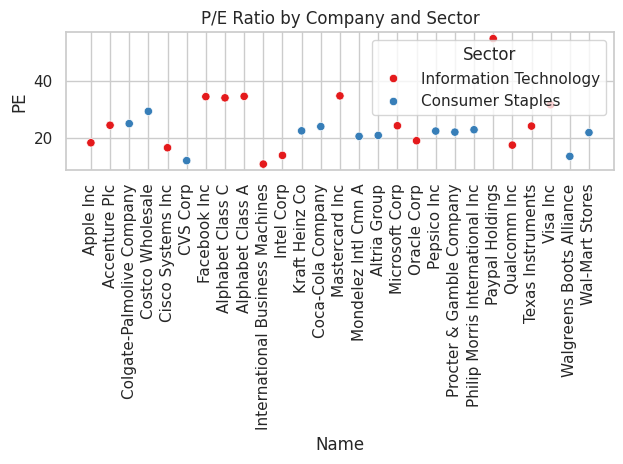

In [20]:
sns.set(style='whitegrid')

sns.scatterplot(data=it_and_cs, x='Name', y='PE', hue='Sector', palette='Set1')

plt.xticks(rotation=90)
plt.title('P/E Ratio by Company and Sector')
plt.tight_layout()

plt.show()
sns.reset_defaults()

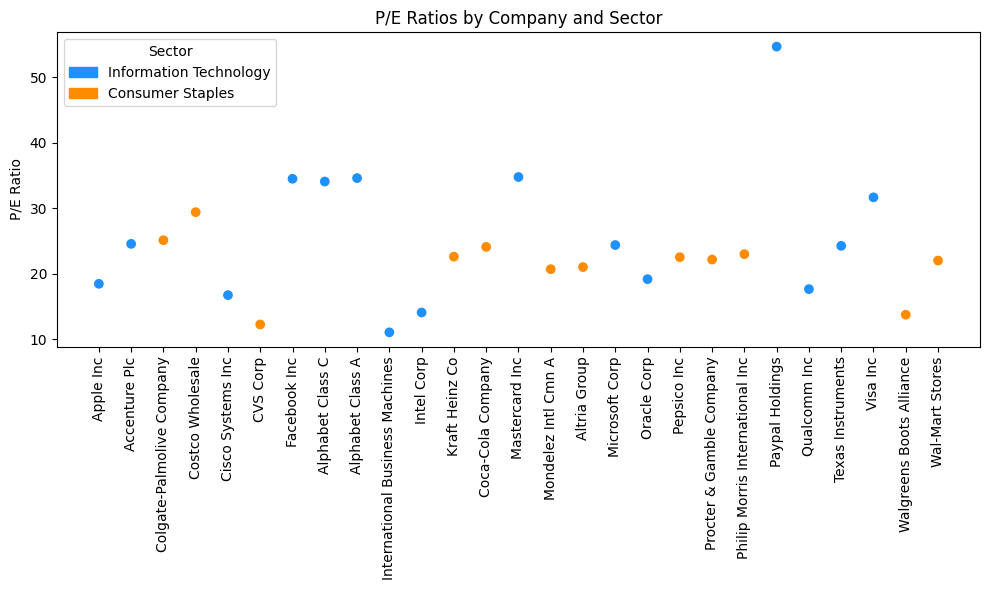

In [21]:
# Define colors once
sector_colors = {
    'Information Technology': 'dodgerblue',
    'Consumer Staples': 'darkorange'
}

# Map colors to your data
colors = it_and_cs['Sector'].map(sector_colors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(it_and_cs['Name'], it_and_cs['PE'], c=colors)
plt.xticks(rotation=90)
plt.ylabel('P/E Ratio')
plt.title('P/E Ratios by Company and Sector')
plt.tight_layout()

# Add legend using Patch handles
legend_handles = [Patch(color=color, label=sector) for sector, color in sector_colors.items()]
plt.legend(handles=legend_handles, title='Sector')

plt.show()

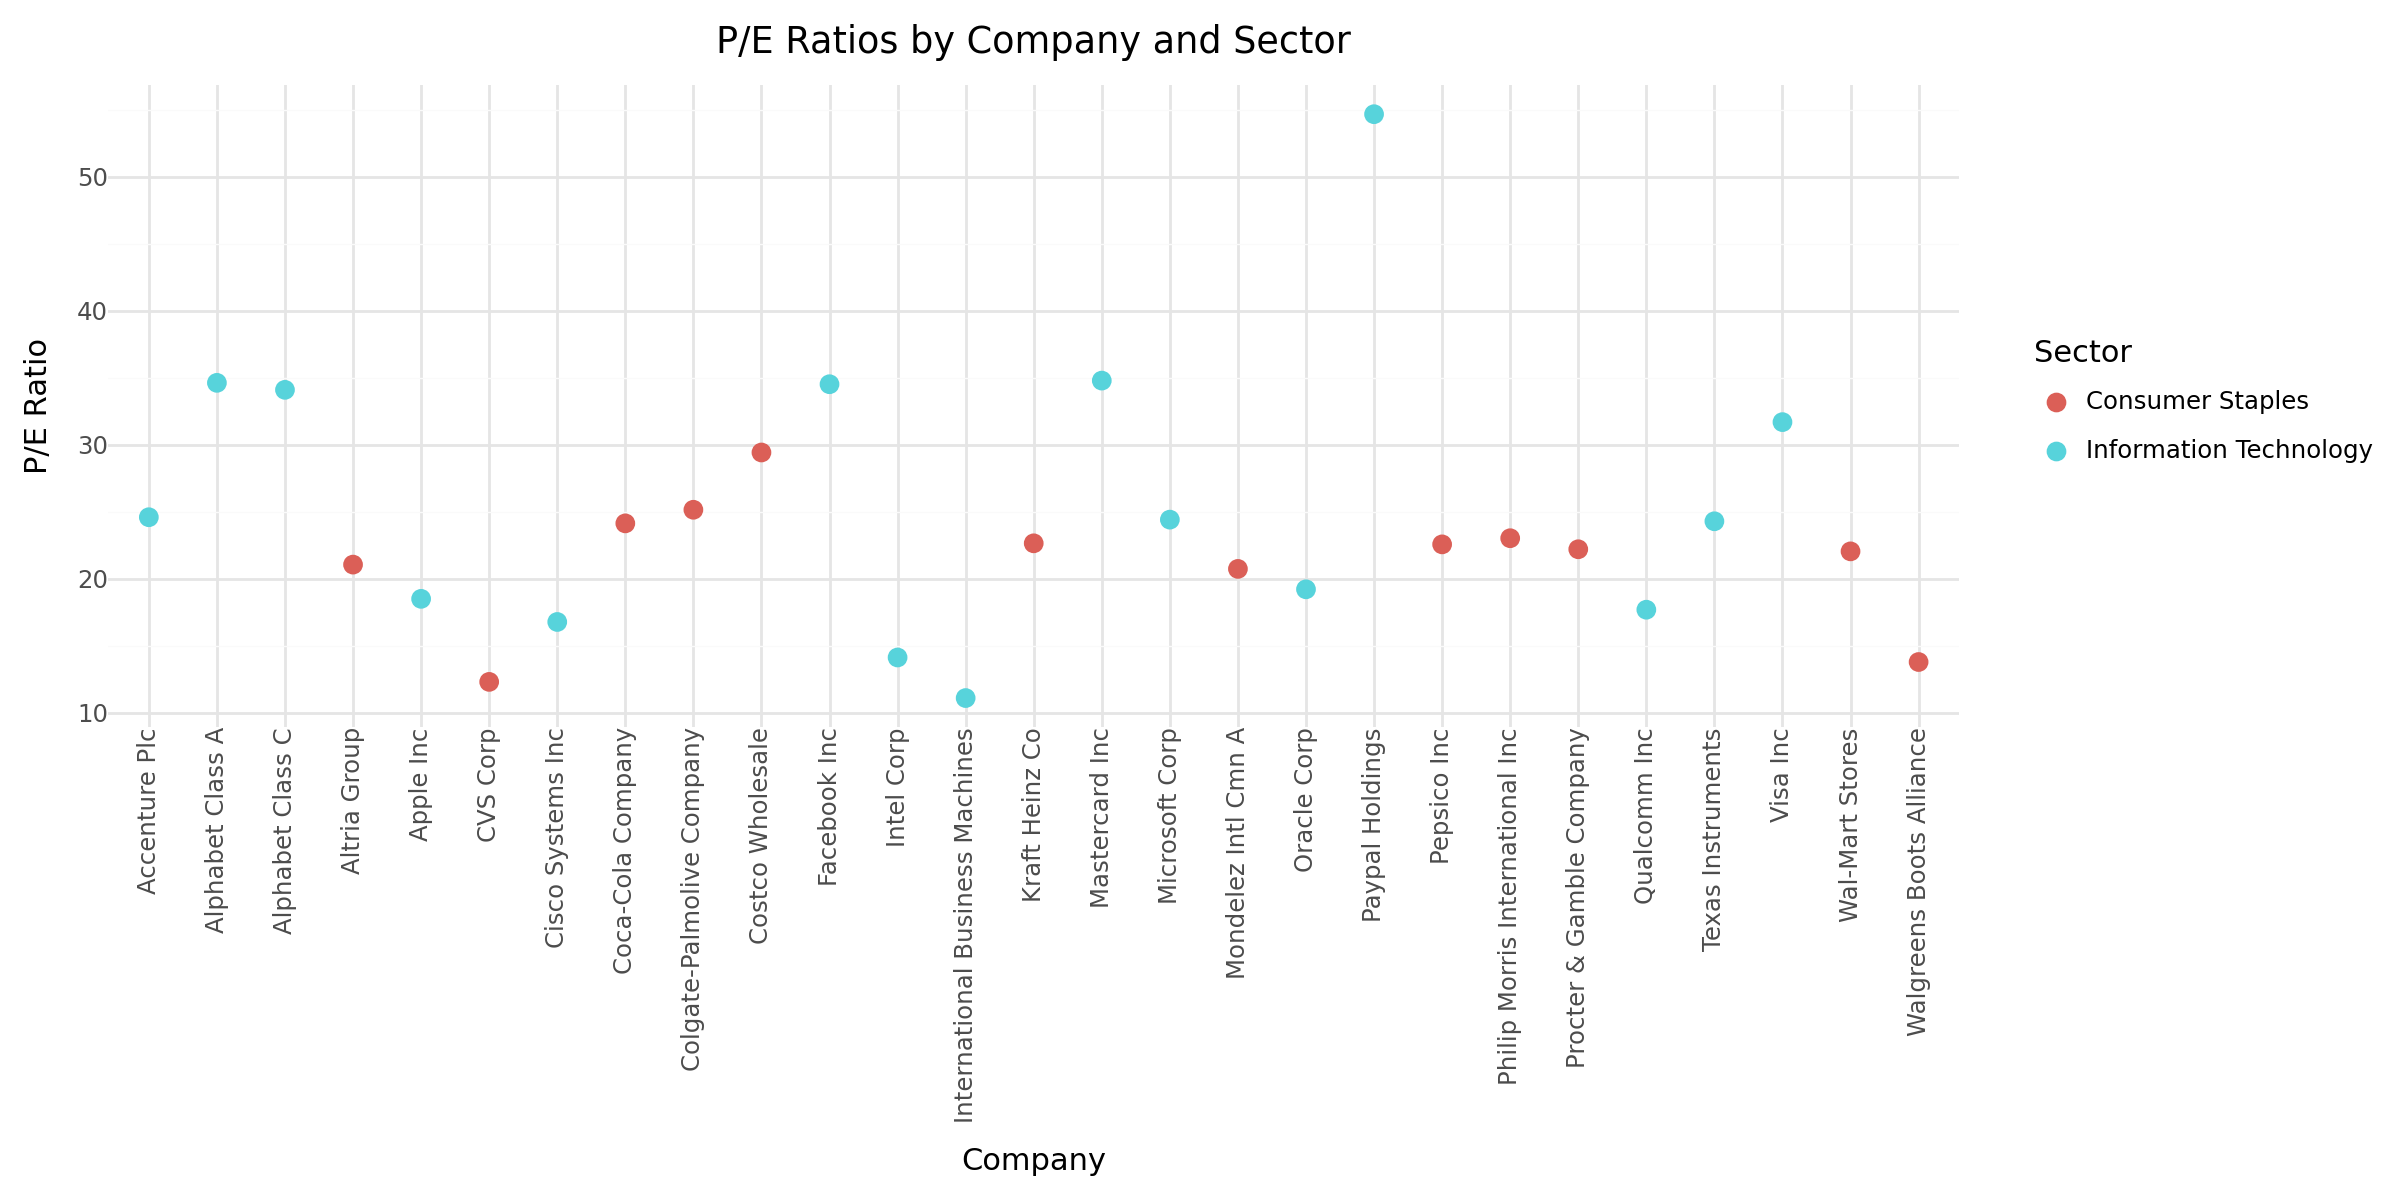

In [22]:
from plotnine import geom_point, theme, element_text

(
    ggplot(it_and_cs, aes(x='Name', y='PE', color='Sector'))
    + geom_point(size=3)
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=90),
            figure_size=(12, 6))
    + labs(
        title='P/E Ratios by Company and Sector',
        x='Company',
        y='P/E Ratio'
    )
)

## Visualizing trends

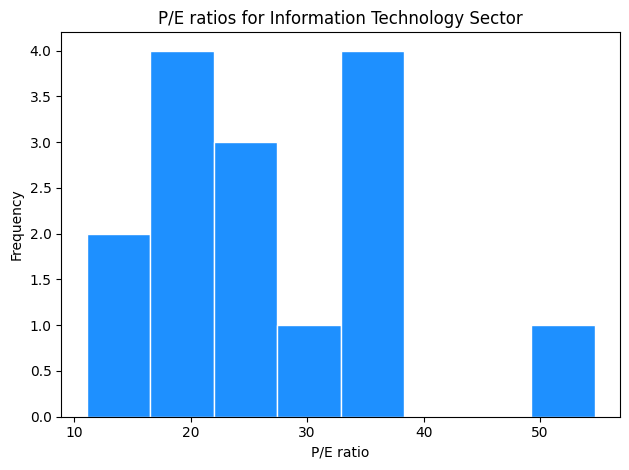

In [23]:
sector = 'Information Technology'

plt.hist(sp[sp['Sector'] == sector]['PE'], bins=8, color='dodgerblue', edgecolor='white')
plt.xlabel('P/E ratio')
plt.ylabel('Frequency')
plt.title('P/E ratios for Information Technology Sector')

plt.tight_layout()
plt.show()

In [24]:
# identify the outlier

outlier = sp[(sp['PE'] > 50) & (sp['Sector'] == 'Information Technology')]

print(f"{outlier['Name'].values[0]} has an abnormally high P/E ratio of {outlier['Price'].values[0]}")

Paypal Holdings has an abnormally high P/E ratio of 76.55
